# A exponencial complexa

_Luis Caldas de Oliveira_

Este notebook apresenta a exponencial complexa e a sua utilização na representação de sinais. A função exponencial complexa tem um papel central na análise e processamento de sinais.

## Função exponencial

A fómula de Euler:
$$e^{j\varphi} = \cos(\varphi) + j \sin(\varphi) ,\; \forall \varphi \in \mathbb{R}$$

Permite-nos representar um número complexo na forma polar (módulo e argumento) de uma forma compacta:
$$
z = |z| \cos(\angle z) + j |z| \sin(\angle z) = |z| e^{j\angle z}
$$


<IPython.core.display.Math object>

<IPython.core.display.Math object>

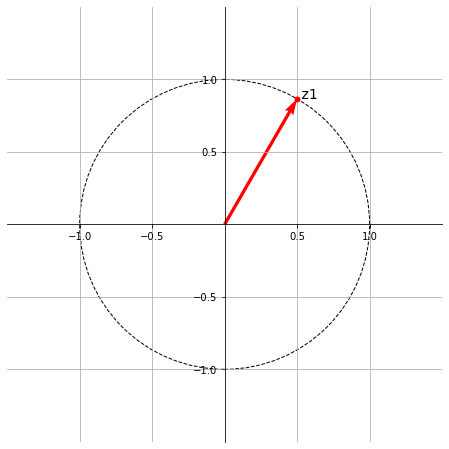

In [75]:
import numpy as np
import sympy as sp
from IPython.display import display, Math
sp.init_printing()

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8, 8]

t, sigma, omega, phi = sp.symbols('t sigma omega, phi', real=True)

phi = sp.pi/3
display(Math('\phi = ' + sp.latex(phi)))

z1 = sp.exp(sp.I * phi)
display(Math('z_1 = ' + sp.latex(z1) + 
             ' = ' + sp.latex(sp.re(z1)) + '+ i' + sp.latex(sp.im(z1)) ))
        
z = complex(z1)



ax = plt.subplot(111)
uc = plt.Circle((0,0), radius=1, fill=False,
                        color='black', ls='dashed')
ax.add_patch(uc)
t1 = plt.plot(z.real, z.imag, 'go', ms=10)

plt.setp(t1, markersize=5.0, markeredgewidth=1.0,
              markeredgecolor='r', markerfacecolor='r')
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r = 1.5; plt.axis('scaled')
plt.axis([-r, r, -r, r])
ticks = [-1, -.5, .5, 1]
plt.xticks(ticks)
plt.yticks(ticks)

ax.annotate(' z1', (z.real,z.imag),fontsize=14)
ax.quiver(0, 0, z.real, z.imag, angles='xy', scale_units='xy',color=['r','b'],scale=1)
plt.grid()
plt.show()

## Sinal exponencial complexo em tempo contínuo


Um sinal exponencial complexo em tempo contínuo $x(t)$ é definido pela função exponencial complexa:
$$ x(t) = e^{st}, \; t \in \mathbb{R}, \; s \in \mathbb{C}$$
Em que $s$ é a frequência complexa. 
e representando o número complexo na forma $s=\sigma+j\omega$ com $\sigma,\omega \in \mathbb{R}$, podemos exprimir o sinal como:
$$
x(t) = e^{(\sigma + j \omega) t} = e^{\sigma t} \cos(\omega t) + j e^{\sigma t} \sin(\omega t)
$$

Na implementação em SymPy é importante notar que `sympy.I` corresponde a $j$ e que a impressão de expressões usa a letra $i$ em vez de $j$. 

In [73]:

s = sigma + sp.I*omega
x = sp.exp(s*t)
display(x)

Podemos agora atribuir valores à frequência complexa e representar a parte real e imaginária do sinal $x(t)$.

Notar que
$$\omega = 2 \pi /T$$
em que $T$ é o período da oscilação amortecida em segundos.

A envolvente do amortecimento tem a expressão:
$$e^{\sigma t} = e^{-t/\tau}$$
O valor de $\tau$ dá uma ideia da velocidade de decaimento da exponencial pois quando $t=\tau$ a amplitude da exponencial reduziu-se em $e^{-1} \approx 37%$ do seu valor inicial.

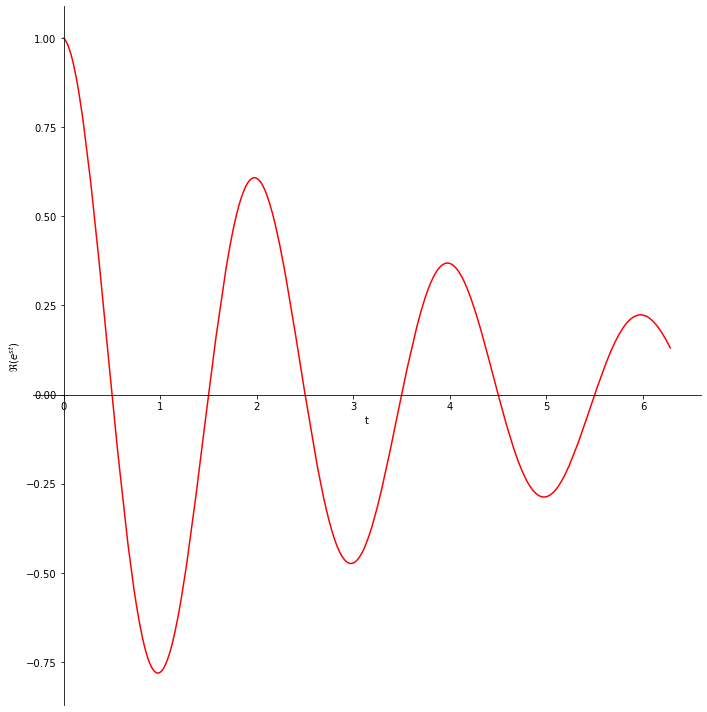

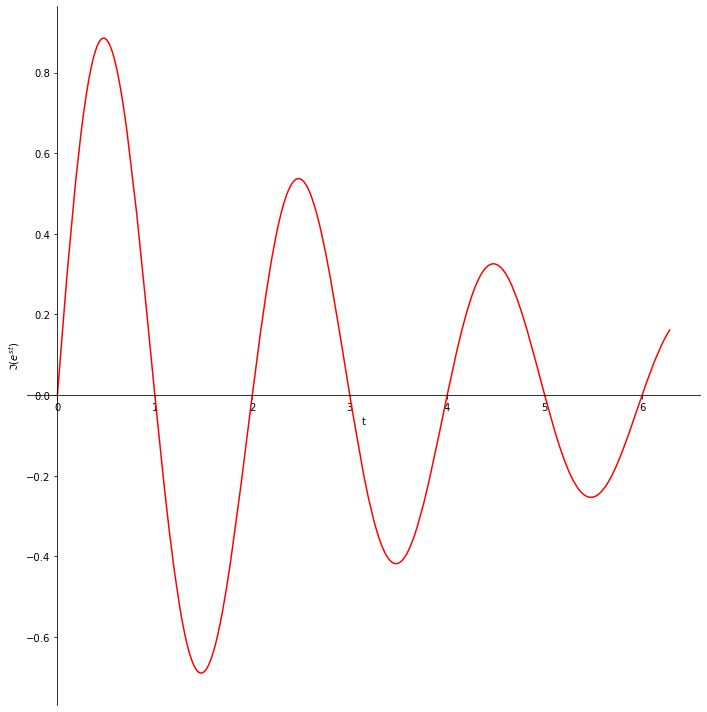

In [74]:
T = 2
tau = 4
y = x.subs({omega: 2*sp.pi/T, sigma: -1/tau})

sp.plot(sp.re(y), (t, 0, 2*sp.pi), ylabel='$\Re(e^{st})$', line_color='red')
sp.plot(sp.im(y), (t, 0, 2*sp.pi), ylabel='$\Im(e^{st})$', line_color='red');

## Sinal exponencial complexo em tempo discreto

O sinal exponencial complexo em tempo discreto é definido pela função exponencial complexa:
$$
x(n) = e^{(\Sigma + j \Omega) \, n} = z^n
, \; n \in \mathbb{Z}
, \; \Sigma,\Omega  \in \mathbb{R}
, \; z \in \mathbb{C}

em que $z = e^{\Sigma + j \Omega}$ se denomina com frequência complexa.

Começamos por importar a biblioteca NumPy e definir uma função para traçar o gráfico de um sinal em tempo discreto

In [44]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def PlotDSignal(var: np.array, signal: np.array, name: str) -> None:
    markerline, stemlines, baseline = plt.stem(
        var, signal,
        linefmt='red',markerfmt='o',basefmt='black')
    markerline.set_color('red')
    markerline.set_markerfacecolor('none')
    plt.stem(var, signal,linefmt='red',markerfmt='o',basefmt='black')
    plt.xlabel('$n$')
    plt.ylabel('$'+name+'$')
    print(name)
    plt.show()
    return



Podemos agora definir o sinal em tempo discreto:
$$x(n) = e^{(\Sigma + j \Omega) \, n}$$

In [45]:
def xd(n, Sigma, Omega):
    return np.exp((Sigma + 1j * Omega) * n)

E traçar os gráficos da sua parte real e imaginária

Re(x(n))


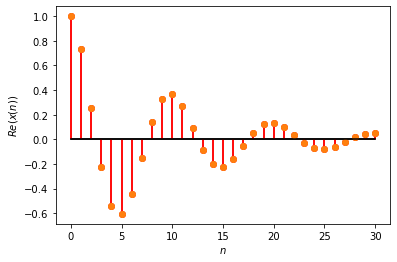

Im(x(n))


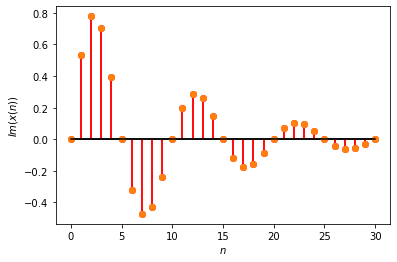

In [39]:
n = np.arange(31)
Omega = 2*np.pi/10
Sigma = -1/10
PlotDSignal(n, np.real(xd(n, Sigma, Omega)), 'Re(x(n))')
PlotDSignal(n, np.imag(xd(n, Sigma, Omega)), 'Im(x(n))')


## Amostragem de sinal periódico em tempo contínuo

A amostragem de um sinal periódico em tempo contínuo nem sempre resulta num sinal periódico em tempo discreto.

Considerando o sinal periódico:
$$x_c(t) = x_c(t+T) , \;\; T \in \mathbb{R} \land \forall t \in \mathbb{R}$$

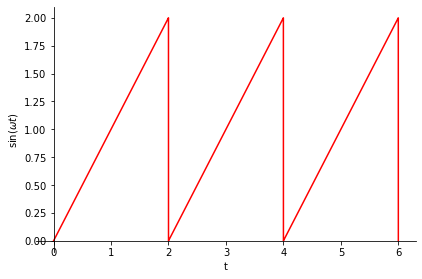

In [83]:
T = 2
omega = 2*np.pi/T
xc = t % T

sp.plot(xc, (t, 0, 6),
        ylabel='$\sin(\omega t)$', line_color='red');

O sinal amostrado $x_d(n) = x_c(nT_s)$.

Se $NT_s=kT$ com $k \in \mathbb{Z}$ então 

xd1(n)


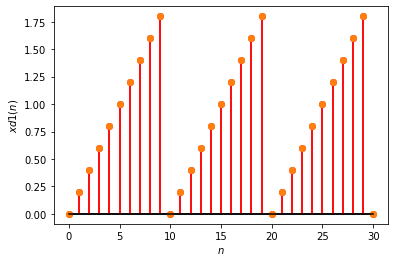

Periódico com N = 10.0
0.0


In [112]:
Ts = T/10
n = sp.Symbol('n', integer=True)
xd1 = xc.subs(t, n*Ts)
xd1n = sp.lambdify(n , xd1, "numpy")
k = np.arange(0, 31)

PlotDSignal(k, xd1n(k), 'xd1(n)')


for k in range(1,20):
    N = k*T/Ts               
    if N.is_integer():
        break
        
if N.is_integer():
    print("Periódico com N =",N)
else:
    print("Não periódico")



Se $T$ não for múltiplo de $T_s$. 

xd2(n)


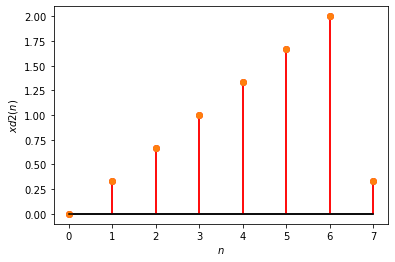

Periódico com N= 6.0
0


In [119]:
Ts = 1/3
n = sp.Symbol('n', integer=True)
xd2 = xc.subs(t, n*Ts)
xd2n = sp.lambdify(n , xd2, "numpy")
k = np.arange(0, 8)

PlotDSignal(k, xd2n(k), 'xd2(n)')

for k in range(1,20):
    N = k*T/Ts               
    if N.is_integer():
        break
        
if N.is_integer():
    print("Periódico com N=",N)
else:
    print("Não periódico")
    
print(xd2.subs(n,6))